In [1]:
#Imporitng necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
pd.options.display.max_columns
df= pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
#removing unnecessary columns and taking necessary information from the datetime
df= df[["fare_amount","pickup_datetime","pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]]

In [5]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
#taking information from the datetimes data
df["pickup_time"]=pd.to_datetime(df["pickup_datetime"])

In [7]:
#Extracting year, month, weekday from the pickup_time
df["month"]= df["pickup_time"].dt.month
df["year"]= df["pickup_time"].dt.year
df["weekday"]= df["pickup_time"].dt.weekday
df["hour"]= df["pickup_time"].dt.hour

In [8]:
#mapping the month into quarter(q1, q2, q3, q4) and hour into hourly segments

df["monthly_quarter"]= df["month"].map({1:"Q1", 2:"Q1", 3:"Q1",
                 4:"Q2", 5:"Q2", 6:"Q2",
                 7:"Q3", 8:"Q3", 9:"Q3",
                 10:"Q4", 11:"Q4", 12:"Q4"})

df["hourly_segment"]= df["hour"].map({1:"H1", 2:"H1", 3:"H1", 4:"H1",
                                     5:"H2",6:"H2",7:"H2",8:"H2",
                                     9:"H3",10:"H3",11:"H3",12:"H3",
                                     13:"H4",14:"H4",15:"H4",16:"H4",
                                     17:"H5",18:"H5",19:"H5",20:"H5",
                                     21:"H6",22:"H6",23:"H6",24:"H6"})
                                      
                            
df["weekdays"]= df["weekday"].map({0:"weekday0",  1:"weekday1",  2:"weekday2",  3:"weekday3",  4:"weekday4",  5:"weekday5",  6:"weekday6"})

In [9]:
#latitude(-90<l<90) and longitude(-180<lo<180)

df=df[(df.pickup_latitude<90) &(df.dropoff_latitude<90)&
   (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
   (df.pickup_longitude>-180) & (df.dropoff_longitude>-180) &
   (df.pickup_longitude<180) & (df.dropoff_longitude<180)]

In [11]:
#calculating the shortest distance between 2 location

import geopy.distance
df["distance"]=  [round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),
                       (df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]

In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,month,year,weekday,hour,monthly_quarter,hourly_segment,weekdays,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00,5,2015,3,19,Q2,H5,weekday3,1681.11
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00,7,2009,4,20,Q3,H5,weekday4,2454.36
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00,8,2009,0,21,Q3,H6,weekday0,5039.60
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00,6,2009,4,8,Q2,H2,weekday4,1661.44
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00+00:00,8,2014,3,17,Q3,H5,weekday3,4483.73


### Handling Missing values 

In [15]:
df.isnull().sum()

fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
pickup_time             0
month                   0
year                    0
weekday                 0
hour                    0
monthly_quarter         0
hourly_segment       7842
weekdays                0
distance                0
dtype: int64

In [18]:
#there are approaximately 8000 missing values in the dataset
df["hourly_segment"].value_counts(ascending=False)

H5    46189
H4    37698
H3    37625
H6    32273
H2    22410
H1    15950
Name: hourly_segment, dtype: int64

In [20]:
df.shape

(199987, 16)

In [22]:
#since the datset is very large, so instead so replacing with max values, just removing the missing values
df.dropna(axis=0, inplace=True)

## Preprocessing on train dataset

In [24]:
df.describe(include="all")

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,month,year,weekday,hour,monthly_quarter,hourly_segment,weekdays,distance
count,192145.000000,192145,192145.000000,192145.000000,192145.000000,192145.000000,192145.000000,192145,192145.000000,192145.000000,192145.000000,192145.000000,192145,192145,192145,1.921450e+05
unique,NaN,188886,NaN,NaN,NaN,NaN,NaN,188886,NaN,NaN,NaN,NaN,4,6,7,NaN
top,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN,2010-03-14 12:00:00+00:00,NaN,NaN,NaN,NaN,Q2,H5,weekday4,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,53028,46189,29620,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01 01:15:22+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:40:39+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11.347737,NaN,-72.502447,39.919173,-72.512527,39.923163,1.681730,NaN,6.279076,2011.742445,3.019553,14.042192,NaN,NaN,NaN,2.051442e+04
std,9.902617,NaN,10.444827,6.120135,10.406839,6.107515,1.388972,NaN,3.441297,1.856500,1.943043,6.037522,NaN,NaN,NaN,3.792132e+05
min,-52.000000,NaN,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,NaN,1.000000,2009.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000e+00
25%,6.000000,NaN,-73.991973,40.735219,-73.991383,40.734250,1.000000,NaN,3.000000,2010.000000,1.000000,10.000000,NaN,NaN,NaN,1.209680e+03


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192145 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        192145 non-null  float64            
 1   pickup_datetime    192145 non-null  object             
 2   pickup_longitude   192145 non-null  float64            
 3   pickup_latitude    192145 non-null  float64            
 4   dropoff_longitude  192145 non-null  float64            
 5   dropoff_latitude   192145 non-null  float64            
 6   passenger_count    192145 non-null  int64              
 7   pickup_time        192145 non-null  datetime64[ns, UTC]
 8   month              192145 non-null  int64              
 9   year               192145 non-null  int64              
 10  weekday            192145 non-null  int64              
 11  hour               192145 non-null  int64              
 12  monthly_quarter    192145 non-

### Converting categorical varibale into dummies


In [27]:
df["passengers"]= df["passenger_count"].map({ 1:"1-passenger_count",  2:"2-passenger_count",  3:"3-passenger_count",  3:"passenger_count",  4:"4-passenger_count",  5:"5-passenger_count",  6:"6-passenger_count", 208:"208-passenger_count"})

df_category=  pd.get_dummies(df[["passengers","year","monthly_quarter","weekdays","hourly_segment"]], drop_first=True)
df_category.head()

,year,passengers_2-passenger_count,passengers_208-passenger_count,passengers_4-passenger_count,passengers_5-passenger_count,passengers_6-passenger_count,passengers_passenger_count,monthly_quarter_Q2,monthly_quarter_Q3,monthly_quarter_Q4,...,weekdays_weekday2,weekdays_weekday3,weekdays_weekday4,weekdays_weekday5,weekdays_weekday6,hourly_segment_H2,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6
0,2015,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2009,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,2009,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2009,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
year_data= pd.get_dummies(df["year"], drop_first=True)

In [29]:
#merging these 3 dataset
df_data= pd.concat([df, df_category,year_data], axis=1)

In [30]:
df_data.columns

Index([                   'fare_amount',                'pickup_datetime',
                     'pickup_longitude',                'pickup_latitude',
                    'dropoff_longitude',               'dropoff_latitude',
                      'passenger_count',                    'pickup_time',
                                'month',                           'year',
                              'weekday',                           'hour',
                      'monthly_quarter',                 'hourly_segment',
                             'weekdays',                       'distance',
                           'passengers',                           'year',
         'passengers_2-passenger_count', 'passengers_208-passenger_count',
         'passengers_4-passenger_count',   'passengers_5-passenger_count',
         'passengers_6-passenger_count',     'passengers_passenger_count',
                   'monthly_quarter_Q2',             'monthly_quarter_Q3',
                   'month

In [31]:
#Removing all the unnecessary columns
#removing all the categorial features
df_data.drop(["weekdays","pickup_datetime","dropoff_longitude","dropoff_latitude","pickup_longitude","pickup_latitude",
                  "year","pickup_time","monthly_quarter","hourly_segment","weekday","passenger_count","passengers","month","hour"],axis=1, inplace=True)


In [33]:
df_data.shape

(192145, 28)

In [36]:
df_data.head()
dfs= df_data.copy()

### Visualizing all numerical columns

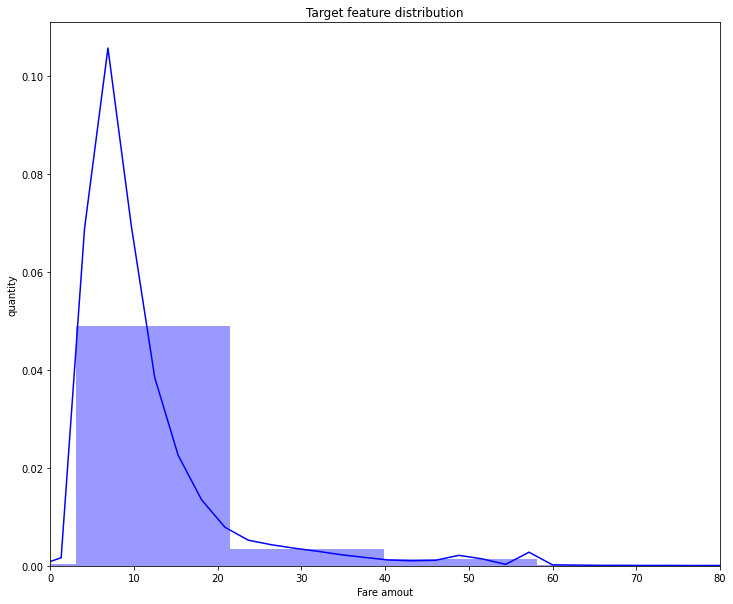

In [42]:
#### Visualizing Distribution of a target features

plt.figure(figsize=[12,10])
sns.distplot(dfs["fare_amount"], bins=30, color="blue" )
plt.xlim(0,80),
plt.title("Target feature distribution")
plt.xlabel("Fare amout")
plt.ylabel("quantity")
plt.show()
plt.close()

In [ ]:
#### Visualizing Distribution of a distance features

plt.figure(figsize=[12,10])
sns.distplot(dfs["distance"], bins=30, color="blue" )

plt.title("Target feature distribution")
plt.xlabel("distance")
plt.ylabel("quantity")
plt.show()
plt.close()

Inference= The distribution looks left skewed, need to perform a normalization.

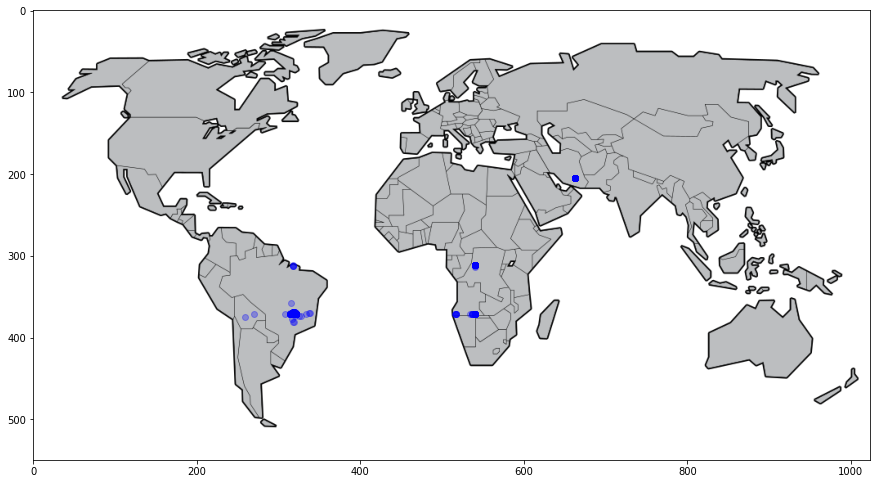

In [45]:
#### Visualizing location 
plt.figure(figsize=[15,12])
empty_map= plt.imread("https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/wm.png")
plt.imshow(empty_map)
plt.scatter((df["pickup_longitude"]+180)*3, 
           (df["pickup_latitude"]+215)*1.45,alpha=0.3, color= "blue")
           

<AxesSubplot:xlabel='hourly_segment', ylabel='count'>

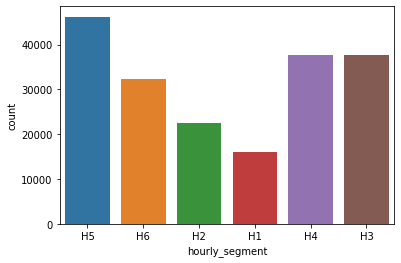

In [47]:
#Visualizing all the categorical columns
sns.countplot(data=df, x= "hourly_segment")

#during h5 hour_range, uber gets more customer as compare to other range.

<AxesSubplot:xlabel='monthly_quarter', ylabel='count'>

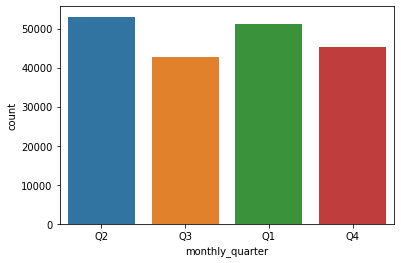

In [48]:
sns.countplot(data=df, x="monthly_quarter")

<AxesSubplot:xlabel='year', ylabel='count'>

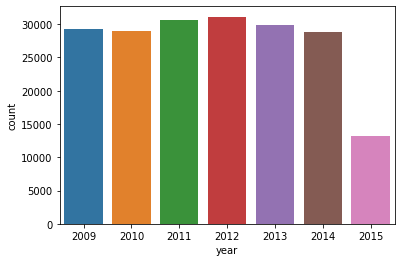

In [49]:
sns.countplot(data=df, x="year")

<AxesSubplot:xlabel='weekday', ylabel='count'>

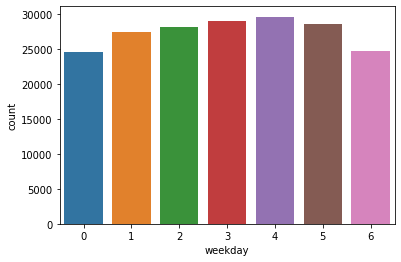

In [51]:
sns.countplot(data=df, x="weekday")

### Outliers detection and removal

In [65]:
q1= dfs["distance"].quantile(0.25)
q3 = dfs["distance"].quantile(0.75)

IQR= q3-q1
min_outliers= dfs[dfs["distance"]<= (q1-1.5*IQR)]
max_outliers= dfs[dfs["distance"]>= (q3+1.5*IQR)]

print('\033[1m',"The outliers below 5% of the data:\n", min_outliers.shape[0],"\n",
     "The outliers above 96% of the data:\n", max_outliers.shape[0])

 The outliers below 5% of the data:
 0 
 The outliers above 96% of the data:
 6580


In [66]:
#there are 3259 outliers in the test data[distance], removing these outliers
main_df= dfs[dfs["distance"]<= (q3+1.5*IQR)]
main_df.head()

,fare_amount,distance,passengers_2-passenger_count,passengers_208-passenger_count,passengers_4-passenger_count,passengers_5-passenger_count,passengers_6-passenger_count,passengers_passenger_count,monthly_quarter_Q2,monthly_quarter_Q3,...,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6,2010,2011,2012,2013,2014,2015
0,7.5,1681.11,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,7.7,2454.36,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,12.9,5039.60,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,5.3,1661.44,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,4483.73,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [67]:
main_df.shape
print('\033[1m',"The length before outliers in data:\n",dfs.shape,"\n"
      "The length after the outliers in data:\n", main_df.shape)

 The length before outliers in data:
 (175848, 28) 
The length after the outliers in data:
 (169268, 28)


### Splitting the dataset into train and test

In [123]:
x= main_df.drop("fare_amount", axis=1)
y= main_df["fare_amount"]

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [125]:
print("Training datasets are: \n" , x_train.shape, y_train.shape,"\n" 
     "Test datasets are: \n", x_test.shape, y_test.shape)

Training datasets are: 
 (135414, 27) (135414,) 
Test datasets are: 
 (33854, 27) (33854,)


# Feature Selection

#### Using Correlation

Text(0.5, 1.0, 'Correlation between indepenent feautures')

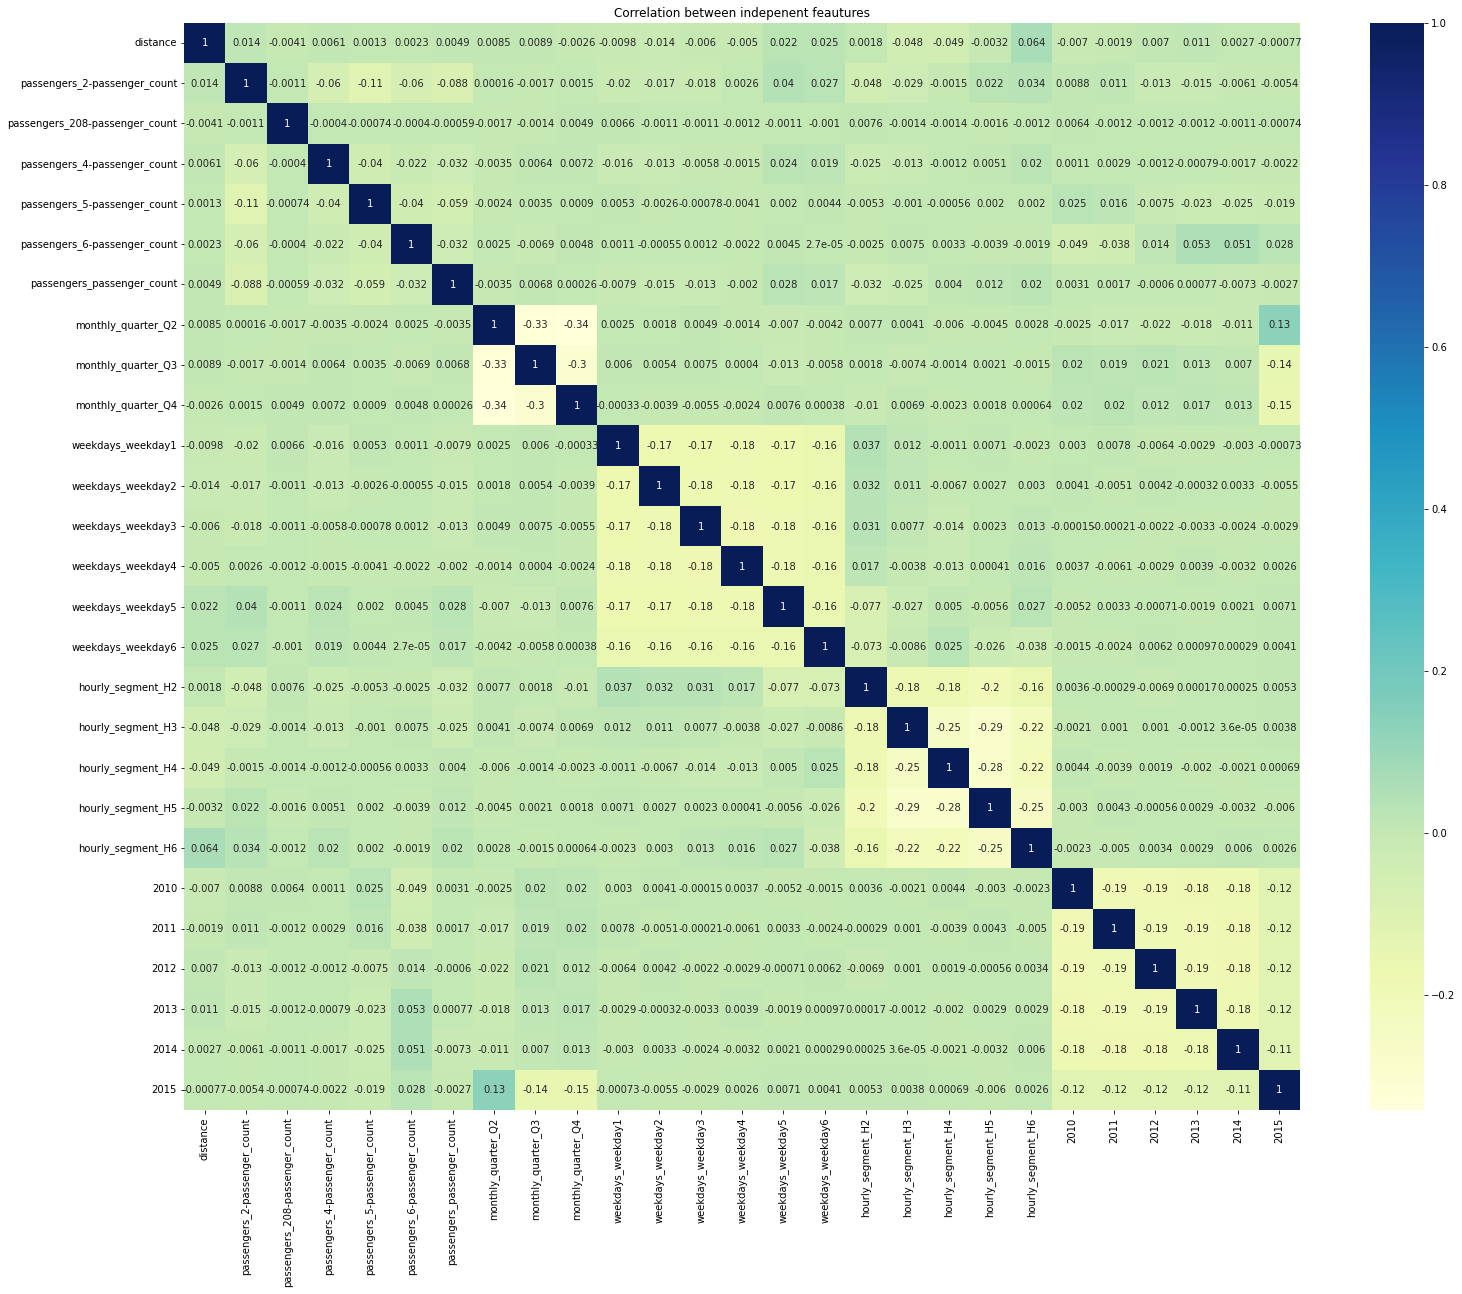

In [97]:
correlation= x_train.corr()
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.title("Correlation between indepenent feautures")

In [98]:
def correlations(dataset, threshold):
    column_cor= set()
    for i in range(len(correlation)):
        for j in range(i):
            if correlation.iloc[i,j]>threshold:
                column= correlation.columns[i]
                column_cor.add(column)
            return column_cor

In [101]:
correlated_features= correlations(x_train, 0.85)
correlated_features

set()

#there is no correlation between independent features.

#### Checking Multicolinearity between the model

In [103]:
import statsmodels.api as sm
X_train= sm.add_constant(x_train)  #1 constant will be added into the data with 1-value
model= sm.OLS(y_train,X_train ).fit()

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1628.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:17:25   Log-Likelihood:            -4.0644e+05
No. Observations:              135414   AIC:                         8.129e+05
Df Residuals:                  135386   BIC:                         8.132e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3203      0.076     43.455      0.000       3.171       3.470
distance                           0.0019   9.26e-06    199.949      0.000       0.002       0.002
passengers_2-passenger_count       0.1458      0.038      3.793      0.000       0.070       0.221
passengers_208-passenger_count     7.6763      4.868      1.577      0.115      -1.865      17.218
passengers_4-passenger_count       0.3002      0.093      3.238      0.001       0.118       0.482
passengers_5-passenger_count       0.0152      0.053      0.289      0.773      -0.088       0.118
passengers_6-passenger_count      -0.0852      0.093     -0.917      0.359      -0.267       0.097
passengers_passenger_count         0.1981      0.065      3.049      0.002       0.071       0.325
monthly_quarter_Q2                 0.2204      0.036      6.140      0.000       0.150       0.291
monthly_quarter_Q3                 0.3602      0.039      9.315      0.000       0.284       0.436
monthly_quarter_Q4                 0.5384      0.038     14.158      0.000       0.464       0.613
weekdays_weekday1                  0.2457      0.051      4.837      0.000       0.146       0.345
weekdays_weekday2                  0.4628      0.051      9.150      0.000       0.364       0.562
weekdays_weekday3                  0.4938      0.050      9.816      0.000       0.395       0.592
weekdays_weekday4                  0.4485      0.050      8.964      0.000       0.350       0.547
weekdays_weekday5                  0.1128      0.051      2.218      0.027       0.013       0.213
weekdays_weekday6                 -0.0135      0.053     -0.252      0.801      -0.118       0.091
hourly_segment_H2                 -0.2393      0.063     -3.770      0.000      -0.364      -0.115
hourly_segment_H3                  0.4321      0.057      7.544      0.000       0.320       0.544
hourly_segment_H4                  0.4462      0.057      7.811      0.000       0.334       0.558
hourly_segment_H5                  0.1495      0.056      2.683      0.007       0.040       0.259
hourly_segment_H6                 -0.2439      0.059     -4.152      0.000      -0.359      -0.129
2010                               0.1404      0.048      2.944      0.003       0.047       0.234
2011                               0.0870      0.047      1.846      0.065      -0.005       0.179
2012                               0.6087      0.047     12.893      0.000       0.516       0.701
2013                               1.5592      0.048     32.741      0.000       1.466       1.653
2014                               1.8433      0.048     38.194      0.000       1.749       1.938
2015                               1.8489      0.062     29.657      0.000       1.727       1.971
==============

Inference:- 
    from the stats, std error(standard deviation are not so high), that means features are not correlated.also p-value is less than 0.05 except 4 features, and 
    p values of 0, it means the null hypothesis is rejected and your test is statistically significant

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_temp = sm.add_constant(x_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

    VIF Factor                        features
0         33.4                           const
1          1.0                        distance
2          1.0    passengers_2-passenger_count
3          1.0  passengers_208-passenger_count
4          1.0    passengers_4-passenger_count
5          1.0    passengers_5-passenger_count
6          1.0    passengers_6-passenger_count
7          1.0      passengers_passenger_count
8          1.5              monthly_quarter_Q2
9          1.5              monthly_quarter_Q3
10         1.5              monthly_quarter_Q4
11         1.8               weekdays_weekday1
12         1.8               weekdays_weekday2
13         1.9               weekdays_weekday3
14         1.9               weekdays_weekday4
15         1.9               weekdays_weekday5
16         1.8               weekdays_weekday6
17         2.3               hourly_segment_H2
18         3.0               hourly_segment_H3
19         3.0               hourly_segment_H4
20         3.

#here every features is important, since not a single features has a variation inflation factor greater than 10.

## Standardization and Normalization

###### Previously we have seen, the target features seems to be left skewed, so normalizing it.

In [137]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

#Standarization on train dataset
train_std= std.fit_transform(x_train)

##Standarization on test dataset
test_std= std.fit_transform(x_test)

#converting array into dataframe
train_std_data= pd.DataFrame(train_std,columns=x_train.columns)
test_std_data= pd.DataFrame(test_std, columns=x_test.columns)

display(train_std_data.describe())
display(test_std_data.describe())

X_train= train_std_data.copy()
X_test= test_std_data.copy()


,distance,passengers_2-passenger_count,passengers_208-passenger_count,passengers_4-passenger_count,passengers_5-passenger_count,passengers_6-passenger_count,passengers_passenger_count,monthly_quarter_Q2,monthly_quarter_Q3,monthly_quarter_Q4,...,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6,2010,2011,2012,2013,2014,2015
count,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,...,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05,1.354140e+05
mean,7.383993e-17,1.863439e-15,6.265388e-15,-4.523548e-16,-3.911893e-15,1.576700e-15,3.228421e-15,-5.835464e-16,-1.785187e-15,4.852747e-17,...,-2.063353e-15,-6.077868e-15,1.709877e-15,-3.304653e-15,-8.826328e-15,-1.635945e-15,9.246745e-15,9.791704e-16,-5.137653e-16,2.975507e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.524003e+00,-4.106844e-01,-2.717502e-03,-1.465730e-01,-2.739783e-01,-1.467306e-01,-2.153015e-01,-6.171611e-01,-5.322039e-01,-5.545509e-01,...,-5.008214e-01,-4.969658e-01,-5.714664e-01,-4.439877e-01,-4.246836e-01,-4.368045e-01,-4.367926e-01,-4.294943e-01,-4.162680e-01,-2.711328e-01
25%,-7.458151e-01,-4.106844e-01,-2.717502e-03,-1.465730e-01,-2.739783e-01,-1.467306e-01,-2.153015e-01,-6.171611e-01,-5.322039e-01,-5.545509e-01,...,-5.008214e-01,-4.969658e-01,-5.714664e-01,-4.439877e-01,-4.246836e-01,-4.368045e-01,-4.367926e-01,-4.294943e-01,-4.162680e-01,-2.711328e-01
50%,-2.318852e-01,-4.106844e-01,-2.717502e-03,-1.465730e-01,-2.739783e-01,-1.467306e-01,-2.153015e-01,-6.171611e-01,-5.322039e-01,-5.545509e-01,...,-5.008214e-01,-4.969658e-01,-5.714664e-01,-4.439877e-01,-4.246836e-01,-4.368045e-01,-4.367926e-01,-4.294943e-01,-4.162680e-01,-2.711328e-01
75%,5.624999e-01,-4.106844e-01,-2.717502e-03,-1.465730e-01,-2.739783e-01,-1.467306e-01,-2.153015e-01,1.620323e+00,-5.322039e-01,-5.545509e-01,...,-5.008214e-01,-4.969658e-01,-5.714664e-01,-4.439877e-01,-4.246836e-01,-4.368045e-01,-4.367926e-01,-4.294943e-01,-4.162680e-01,-2.711328e-01
max,2.854410e+00,2.434960e+00,3.679851e+02,6.822540e+00,3.649924e+00,6.815210e+00,4.644649e+00,1.620323e+00,1.878979e+00,1.803261e+00,...,1.996720e+00,2.012211e+00,1.749884e+00,2.252315e+00,2.354694e+00,2.289353e+00,2.289416e+00,2.328320e+00,2.402299e+00,3.688230e+00


,distance,passengers_2-passenger_count,passengers_208-passenger_count,passengers_4-passenger_count,passengers_5-passenger_count,passengers_6-passenger_count,passengers_passenger_count,monthly_quarter_Q2,monthly_quarter_Q3,monthly_quarter_Q4,...,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6,2010,2011,2012,2013,2014,2015
count,3.385400e+04,3.385400e+04,33854.0,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,...,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04,3.385400e+04
mean,1.540880e-16,-9.463131e-16,0.0,-6.357284e-16,-1.287956e-15,-3.948451e-16,4.035684e-16,-1.222432e-15,1.611001e-15,-6.613721e-16,...,-8.037557e-16,-4.410492e-16,5.979148e-16,-1.157004e-15,-1.042945e-15,-1.745920e-15,-3.770541e-16,-1.342749e-15,7.471754e-16,-1.312850e-15
std,1.000015e+00,1.000015e+00,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.533225e+00,-4.106440e-01,0.0,-1.469919e-01,-2.791282e-01,-1.477243e-01,-2.101607e-01,-6.111455e-01,-5.358875e-01,-5.543975e-01,...,-5.020392e-01,-4.904362e-01,-5.684589e-01,-4.505226e-01,-4.220724e-01,-4.365490e-01,-4.449607e-01,-4.238680e-01,-4.217324e-01,-2.690374e-01
25%,-7.504760e-01,-4.106440e-01,0.0,-1.469919e-01,-2.791282e-01,-1.477243e-01,-2.101607e-01,-6.111455e-01,-5.358875e-01,-5.543975e-01,...,-5.020392e-01,-4.904362e-01,-5.684589e-01,-4.505226e-01,-4.220724e-01,-4.365490e-01,-4.449607e-01,-4.238680e-01,-4.217324e-01,-2.690374e-01
50%,-2.264669e-01,-4.106440e-01,0.0,-1.469919e-01,-2.791282e-01,-1.477243e-01,-2.101607e-01,-6.111455e-01,-5.358875e-01,-5.543975e-01,...,-5.020392e-01,-4.904362e-01,-5.684589e-01,-4.505226e-01,-4.220724e-01,-4.365490e-01,-4.449607e-01,-4.238680e-01,-4.217324e-01,-2.690374e-01
75%,5.720560e-01,-4.106440e-01,0.0,-1.469919e-01,-2.791282e-01,-1.477243e-01,-2.101607e-01,1.636271e+00,-5.358875e-01,-5.543975e-01,...,-5.020392e-01,-4.904362e-01,-5.684589e-01,-4.505226e-01,-4.220724e-01,-4.365490e-01,-4.449607e-01,-4.238680e-01,-4.217324e-01,-2.690374e-01
max,2.853526e+00,2.435199e+00,0.0,6.803097e+00,3.582583e+00,6.769368e+00,4.758262e+00,1.636271e+00,1.866063e+00,1.803760e+00,...,1.991876e+00,2.039001e+00,1.759142e+00,2.219644e+00,2.369262e+00,2.290694e+00,2.247390e+00,2.359225e+00,2.371172e+00,3.716955e+00


In [146]:
Y_train= std.fit_transform(y_train.values.reshape(-1,1))

In [149]:
Y_test= std.fit_transform(y_test.values.reshape(-1,1))

In [138]:
#### Mututal Information gain- Regression statement
from sklearn.feature_selection import mutual_info_regression
mutual_info= mutual_info_regression(x_train, y_train, random_state=42)

In [143]:
print(mutual_info)
mutual_infos= pd.Series(mutual_info, index= x_train.columns)
mutual_infos.sort_values(ascending=False)

[6.53087109e-01 6.84741061e-05 2.83302951e-03 2.35039556e-04
 0.00000000e+00 4.04913628e-03 0.00000000e+00 1.42527964e-03
 4.19272741e-03 6.28479994e-03 0.00000000e+00 5.62039701e-04
 0.00000000e+00 8.49472513e-03 1.17938762e-03 0.00000000e+00
 5.13767523e-03 4.05151402e-03 0.00000000e+00 0.00000000e+00
 4.34748519e-03 7.45671543e-02 8.01498858e-02 5.11849391e-03
 1.14317691e-01 1.12837524e-01 4.84014471e-02]


distance                          0.653087
2013                              0.114318
2014                              0.112838
2011                              0.080150
2010                              0.074567
2015                              0.048401
weekdays_weekday4                 0.008495
monthly_quarter_Q4                0.006285
hourly_segment_H2                 0.005138
2012                              0.005118
hourly_segment_H6                 0.004347
monthly_quarter_Q3                0.004193
hourly_segment_H3                 0.004052
passengers_6-passenger_count      0.004049
passengers_208-passenger_count    0.002833
monthly_quarter_Q2                0.001425
weekdays_weekday5                 0.001179
weekdays_weekday2                 0.000562
passengers_4-passenger_count      0.000235
passengers_2-passenger_count      0.000068
passengers_5-passenger_count      0.000000
hourly_segment_H4                 0.000000
hourly_segment_H5                 0.000000
weekdays_we

In [145]:
from sklearn.feature_selection import SelectKBest

#from all the information gain of that columns, selecting top 20 percentiles columns

top_column= SelectKBest(mutual_info_regression, k=20)
top_column.fit(x_train, y_train)
X_train.columns[top_column.get_support()]

Index([                    'distance', 'passengers_4-passenger_count',
       'passengers_5-passenger_count', 'passengers_6-passenger_count',
                 'monthly_quarter_Q3',           'monthly_quarter_Q4',
                  'weekdays_weekday1',            'weekdays_weekday2',
                  'weekdays_weekday5',            'weekdays_weekday6',
                  'hourly_segment_H2',            'hourly_segment_H3',
                  'hourly_segment_H4',            'hourly_segment_H6',
                                 2010,                           2011,
                                 2012,                           2013,
                                 2014,                           2015],
      dtype='object')

## Model Building

### Multiple Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)
y_pred[:5]

slopes= lr.coef_
y_intercepts= lr.intercept_
print("The slope of the data is:\n", slopes,"\n",
     "The intercept of the data:-\n", y_intercepts)

yhat_train= lr.predict(X_train)
print("The predicted values using train data:-", yhat_train)

The slope of the data is:
 [[ 0.47498491  0.00914413  0.00372385  0.00768962  0.00069088 -0.00218535
   0.00727471  0.01758122  0.02666998  0.04076108  0.01543454  0.02929351
   0.03157763  0.028981    0.00717485 -0.00079441 -0.01357439  0.03088627
   0.03174802  0.01149988 -0.01614508  0.00901991  0.00569854  0.03986057
   0.10092837  0.11674462  0.08336045]] 
 The intercept of the data:-
 [-9.22586129e-17]
The predicted values using train data:- [[-0.50047084]
 [-0.42746548]
 [-0.05472241]
 ...
 [ 0.29932099]
 [ 0.01222864]
 [-0.29602405]]


In [162]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#model Evaluation
print( '\033[1m'+"The Mean Absolute error for mutiple regression model is:\n",
      mean_absolute_error(Y_test,y_pred))
print("The Mean Squared error for mutiple regression model is:\n", 
      mean_squared_error(Y_test,y_pred))
print("The r2 score for regression model-test data is:\n",
      r2_score(Y_test,y_pred))

print("The r2 score for regression model-train data is:\n",
      r2_score(Y_train,yhat_train))

print("The Mean Squared error for mutiple regression model-train data is:\n", 
      mean_squared_error(Y_train,yhat_train))

The Mean Absolute error for mutiple regression model is:
 0.41055728991619095
The Mean Squared error for mutiple regression model is:
 0.6955074387925559
The r2 score for regression model-test data is:
 0.30449256120744406
The r2 score for regression model-train data is:
 0.24510906440239533
The Mean Squared error for mutiple regression model-train data is:
 0.7548909355976047


#The error is less for this model, but we are getting the less accuracy

### Ridge Regression

In [170]:
from sklearn.linear_model import Ridge
ridge= Ridge()

#to find the best  alpha values, we'll use hyperparamter optimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params= {"alpha":[1e-15, 1e-10, 1e-5, 1e-2, 1, 2, 5,10, 15, 20,25,30, 40,50,60,70,80,90,100]}

ridge_regression= GridSearchCV(ridge, param_grid=params,scoring= "neg_mean_squared_error", cv=6, n_jobs=-1, verbose=1)
ridge_regression.fit(X_train,Y_train)

Fitting 6 folds for each of 19 candidates, totalling 114 fits


GridSearchCV(cv=6, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 15,
                                   20, 25, 30, 40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [171]:
print("The best alpha value for the ridge model is:--", ridge_regression.best_params_,"\n",
     "The negation mean squared error is:--", ridge_regression.best_score_)

The best alpha value for the ridge model is:-- {'alpha': 100} 
 The negation mean squared error is:-- -0.7552325522932853


In [173]:
ridge_regressions= Ridge(alpha=100)
ridge_regressions.fit(X_train,Y_train)
ypred_ridge= ridge_regressions.predict(X_test)
ypred_train_ridge= ridge_regressions.predict(X_train)

##### model Evaluation


In [174]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print( '\033[1m'+"The Mean Absolute error for Ridge regression model is:\n",
      mean_absolute_error(Y_test,ypred_ridge))
print("The Mean Squared error for Ridge regression model is:\n", 
      mean_squared_error(Y_test,ypred_ridge))
print("The r2 score for Ridge regression model-test data is:\n",
      r2_score(Y_test,ypred_ridge))

print("The r2 score for regression model-train data is:\n",
      r2_score(Y_train,ypred_train_ridge))

print("The Mean Squared error for Ridge regression model-train data is:\n", 
      mean_squared_error(Y_train,ypred_train_ridge))

The Mean Absolute error for Ridge regression model is:
 0.41065182907554787
The Mean Squared error for Ridge regression model is:
 0.6955581462517829
The r2 score for Ridge regression model-test data is:
 0.3044418537482171
The r2 score for regression model-train data is:
 0.2451088551089038
The Mean Squared error for Ridge regression model-train data is:
 0.7548911448910962


### lasso Regression Technique

In [183]:
from sklearn.linear_model import Lasso
lasso= Lasso()

paramters= {"alpha":[1e-15, 1e-10, 1e-5, 1e-2, 1, 2, 5,10, 15, 20,25,30,35, 40,50,60,70,80,90,100]}
lasso_optimization= GridSearchCV(lasso, param_grid=paramters, scoring="neg_mean_squared_error",cv=5, n_jobs=-1, verbose=1)
lasso_optimization.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 15,
                                   20, 25, 30, 35, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error', verbose=1)

In [184]:
print("The best alpha value for the lasso model is:--", lasso_optimization.best_params_,"\n",
     "The negation mean squared error for lasso model is:--", lasso_optimization.best_score_)

The best alpha value for the lasso model is:-- {'alpha': 1e-05} 
 The negation mean squared error for lasso model is:-- -0.755252391187081


In [188]:
lasso_model= Lasso(alpha=1e-05)
lasso_model.fit(X_train, Y_train)
ypred_lasso= lasso_model.predict(X_test)
ypred_train_lasso= lasso_model.predict(X_train)

##### model Evaluation 


In [189]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print( '\033[1m'+"The Mean Absolute error for lasso regression model is:\n",
      mean_absolute_error(Y_test,ypred_lasso))
print("The Mean Squared error for lasso regression model is:\n", 
      mean_squared_error(Y_test,ypred_lasso))
print("The r2 score for lasso regression model-test data is:\n",
      r2_score(Y_test,ypred_lasso))

print("The r2 score for regression model-train data is:\n",
      r2_score(Y_train,ypred_train_lasso))

print("The Mean Squared error for lasso regression model-train data is:\n", 
      mean_squared_error(Y_train,ypred_train_lasso))

The Mean Absolute error for lasso regression model is:
 0.4105637819246728
The Mean Squared error for lasso regression model is:
 0.695510861567728
The r2 score for lasso regression model-test data is:
 0.304489138432272
The r2 score for regression model-train data is:
 0.24510905608184608
The Mean Squared error for lasso regression model-train data is:
 0.7548909439181539


### Polynomial Regression


In [194]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures()

#to find the best order value, 
paramter_value={"degree":[1,2,3,4,5,6]}

polymial_regression= GridSearchCV(poly, param_grid=paramter_value, scoring="neg_mean_squared_error", cv=5, n_jobs=-1, verbose=-1)
polymial_regression.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=PolynomialFeatures(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error', verbose=-1)

In [200]:
print("The best degree for the Polynomial model is:--", polymial_regression.best_params_,"\n")

The best degree for the Polynomial model is:-- {'degree': 1} 



#at degree=1, polynomial behave like a muliple linear regression model.

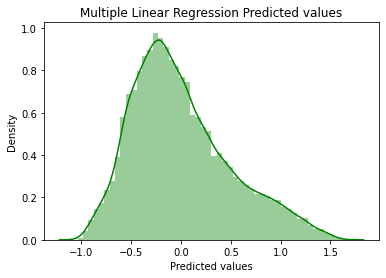

In [201]:
#lets visualize the predicted output of all 3 models
import seaborn as sns
sns.distplot(y_pred, color="green", label="Multilinear Regression")
plt.title("Multiple Linear Regression Predicted values")
plt.xlabel("Predicted values")
plt.show()
plt.close()

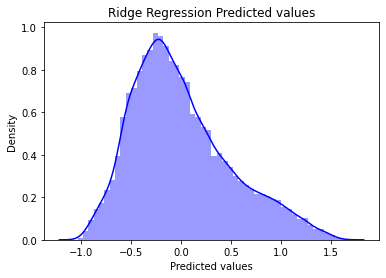

In [202]:
sns.distplot(ypred_ridge,color="blue", label="Ridge Regression Predicted values")
plt.title("Ridge Regression Predicted values")
plt.xlabel("Predicted values")
plt.show()
plt.close()

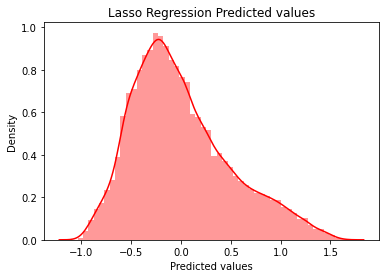

In [203]:
sns.distplot(ypred_lasso, color="red")
plt.title("Lasso Regression Predicted values")
plt.xlabel("Predicted values")
plt.show()
plt.close()

In [204]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='green')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

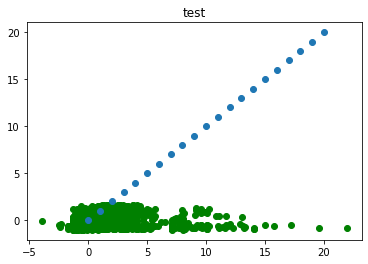

In [205]:
plotGraph(Y_test,y_pred,"test")

## Adaboost Techniques

In [208]:
from sklearn.ensemble import AdaBoostRegressor
adaboost= AdaBoostRegressor(random_state=42)

paramt= {"n_estimators":[2,3,4,5,6,7],
        "learning_rate":[0.05,0.02, 0.1,0.2, 0.4, 0.5,0.6,0.7,0.8,0.9],
        }

adaboost_regressor= GridSearchCV(adaboost, paramt, n_jobs=-1, scoring="neg_mean_squared_error", cv=5, verbose=1)
adaboost_regressor.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.02, 0.1, 0.2, 0.4, 0.5, 0.6,
                                           0.7, 0.8, 0.9],
                         'n_estimators': [2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error', verbose=1)

In [209]:
print("The best estimator value for the lasso model is:--", adaboost_regressor.best_params_,"\n",
     "The negation mean squared error for lasso model is:--", adaboost_regressor.best_score_)

The best estimator value for the lasso model is:-- {'learning_rate': 0.02, 'n_estimators': 6} 
 The negation mean squared error for lasso model is:-- -0.7025883551138087


In [212]:
ada_reg= AdaBoostRegressor(n_estimators=6,learning_rate=0.02 )
ada_reg.fit(X_train, Y_train)
y_pred_ada= ada_reg.predict(X_test)
y_pred_train_ada= ada_reg.predict(X_train)

In [213]:
print( '\033[1m'+"The Mean Absolute error for Adaboost model is:\n",
      mean_absolute_error(Y_test,y_pred_ada))
print("The Mean Squared error for Adaboost model is:\n", 
      mean_squared_error(Y_test,y_pred_ada))
print("The r2 score for Adaboost model-test data is:\n",
      r2_score(Y_test,y_pred_ada))

print("The r2 score for Adaboost model-train data is:\n",
      r2_score(Y_train,y_pred_train_ada))

print("The Mean Squared error for Adaboost model-train data is:\n", 
      mean_squared_error(Y_train,y_pred_train_ada))

The Mean Absolute error for Adaboost model is:
 0.4286326485195727
The Mean Squared error for Adaboost model is:
 0.6627663377892763
The r2 score for Adaboost model-test data is:
 0.3372336622107237
The r2 score for Adaboost model-train data is:
 0.3006941908172932
The Mean Squared error for Adaboost model-train data is:
 0.6993058091827068


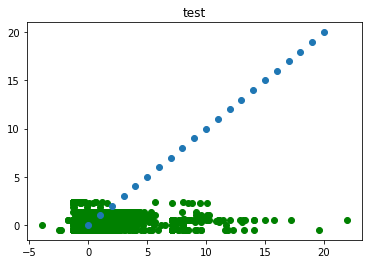

In [214]:
plotGraph(Y_test,y_pred_ada,"test")